In [2]:
#Not needed, just keeping for habit
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/emilysanchez/Documents/BooksDBv2/books1.csv')
df.head()

,book_id,title,author,page_count,book_rating,medium
0,10182,Nexus A Brief History of Information Networks ...,Yuval Harari,0.0,NaN,Kindle
1,10365,Trabajos de reino,Yuri Herrera,101.0,NaN,Kindle
2,10123,How to End a Love Story,Yulin Kuang,384.0,NaN,NaN
3,10187,Not What She Seems,Yasmin Angoe,396.0,NaN,NaN
4,10245,Tell Me You Want Me,Willow Winters,284.0,NaN,NaN


In [6]:
df2 = pd.read_csv('/Users/emilysanchez/Documents/BooksDBv2/tags1.csv')
df2.head()

,book_id,book_title,book_author,book_pages,book_status,book_rating,tag_name
0,10001,1984,George Orwell,328.0,TBR,NaN,Dystopian
1,10002,12-week MBA,Nathan Keacklaurer,NaN,TBR,NaN,Business
2,10002,12: The Elements of Great Managing,Rodd Wagner,288.0,Finished,Okay,Business
3,10004,A False Start,Elsie Silver,NaN,TBR,NaN,Romance
4,10004,A False Start,Elsie Silver,NaN,NaN,NaN,Small Town


In [10]:
tags_grouped = df2.groupby('book_id')['tag_name'].apply('; '.join).reset_index()

combined = pd.merge(df, tags_grouped, on='book_id', how='left')

combined.head(10)


,book_id,title,author,page_count,book_rating,medium,tag_name
0,10182,Nexus A Brief History of Information Networks ...,Yuval Harari,0.0,NaN,Kindle,Business
1,10365,Trabajos de reino,Yuri Herrera,101.0,NaN,Kindle,Latinoamericano
2,10123,How to End a Love Story,Yulin Kuang,384.0,NaN,NaN,Romance
3,10187,Not What She Seems,Yasmin Angoe,396.0,NaN,NaN,Mystery
4,10245,Tell Me You Want Me,Willow Winters,284.0,NaN,NaN,Romance
5,10166,Macbeth,William Shakespeare,249.0,4,NaN,Classic Literature
6,10042,Can I Come Over?,Whitney G.,96.0,3,Kindle,Romance
7,10320,The Queen's Gambit,Walter Tevis,244.0,NaN,Owned,Literary Fiction
8,10269,The Correspondent,Virginia Evans,0.0,NaN,Kindle,Contemporary
9,10255,The Baller,Vi Keeland,0.0,NaN,Kindle,Romance


In [12]:
unique_tags = combined['tag_name'].unique()
print(unique_tags)

['Business' 'Latinoamericano ' 'Romance' 'Mystery' 'Classic Literature'
 'Literary Fiction' 'Contemporary' 'Japanese Fiction' 'Historical Fiction'
 'Self Help' 'Second Chance' 'Dystopian' 'Coming of Age' 'Memoir' 'Health'
 'Historical Fiction; Romance' 'Business; Business'
 'Romance; Second Chance' 'Contemporary; Magical Realism' 'Young Adult'
 'Current Events' 'Psychology; Self Help' 'Magical Realism' 'History'
 'Contemporary; Romance; Second Chance' 'Science Fiction'
 'Romance; Summer' 'Current events' 'Historical Fiction; Literary Fiction'
 'Latinoamericano ; Magical Realism' 'Epics' 'Contemporary; Summer'
 'Fantasy' 'Technology' 'Romance; Small Town' 'Reference'
 'Mystery; Romance' 'Stocks']


In [15]:
combined['author'].describe() #this can either be from combined or from df

count              405
unique             307
top       Tessa Bailey
freq                10
Name: author, dtype: object

In [16]:
df2['tag_name'].describe() #getting this from df2 because I want to analyze the tags separately 

count         419
unique         29
top       Romance
freq          181
Name: tag_name, dtype: object

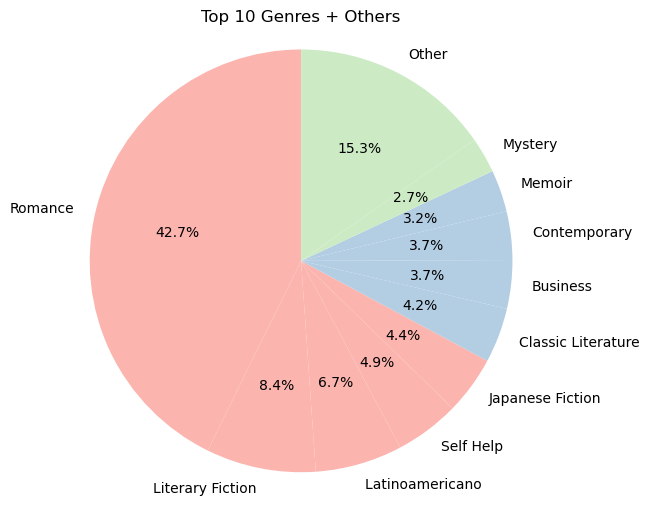

In [27]:
import matplotlib.cm as cm
import numpy as np
#Pie Chart

genre_pie =  combined['tag_name'].value_counts()
top_10 = genre_pie[:10]
others = genre_pie[10:].sum()

n = len(genre_pie)
top_10['Other'] = others

colors = cm.Pastel1(np.linspace(0, 1, n))

plt.figure(figsize=(6,6))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Top 10 Genres + Others')
plt.axis('equal')
plt.show()

In [29]:
from wordcloud import WordCloud

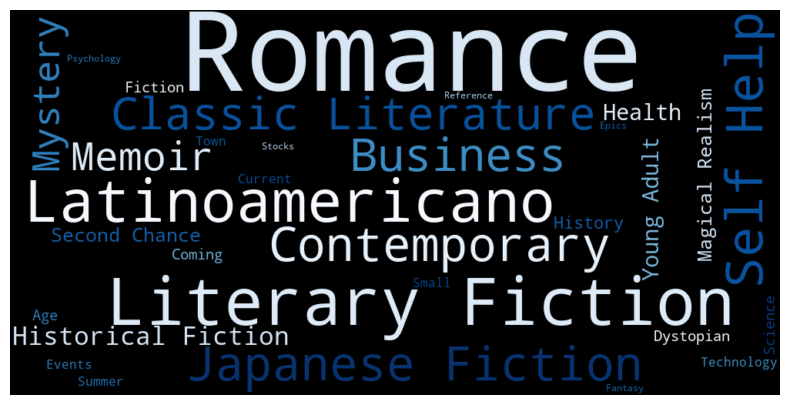

In [31]:
text = ' '.join(df2['tag_name'].astype(str).tolist())


wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='black',
    max_words=100,
    colormap='Blues'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [34]:
combined.to_csv('/Users/emilysanchez/Documents/BooksDBv2/books1.csv', index=False)
print('done!')

done!
